In [123]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load the dataset from hugging face
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean the data for date
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
    

In [124]:
df_PK = df[df['job_country']=='Pakistan'].copy()


In [125]:
df_PK['job_posted_month'] = df_PK['job_posted_date'].dt.strftime('%B')

In [126]:
df_PK_pivot = df_PK.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_PK_pivot


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,7,2,22,39,15,6,1,13,8,7
August,7,5,21,44,16,11,1,7,13,32
December,6,3,16,50,41,22,1,10,12,11
February,10,5,19,45,28,9,3,17,11,28
January,12,5,39,89,65,14,6,16,14,35
July,6,3,18,50,23,22,1,15,7,26
June,10,5,15,46,33,12,2,7,2,12
March,13,2,26,65,33,14,5,13,15,21
May,3,1,12,47,22,19,1,10,4,6


In [129]:
df_PK_pivot.reset_index(inplace=True)
df_PK_pivot['month_no'] = pd.to_datetime(df_PK_pivot['job_posted_month'], format='%B').dt.month
df_PK_pivot.sort_values('month_no',inplace=True)
df_PK_pivot.set_index('job_posted_month', inplace=True)
df_PK_pivot.drop(columns='month_no', inplace=True)
df_PK_pivot


job_title_short,index,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,,
January,4,12,5,39,89,65,14,6,16,14,35
February,3,10,5,19,45,28,9,3,17,11,28
March,7,13,2,26,65,33,14,5,13,15,21
April,0,7,2,22,39,15,6,1,13,8,7
May,8,3,1,12,47,22,19,1,10,4,6
June,6,10,5,15,46,33,12,2,7,2,12
July,5,6,3,18,50,23,22,1,15,7,26
August,1,7,5,21,44,16,11,1,7,13,32
September,11,9,4,27,47,29,26,3,14,8,27


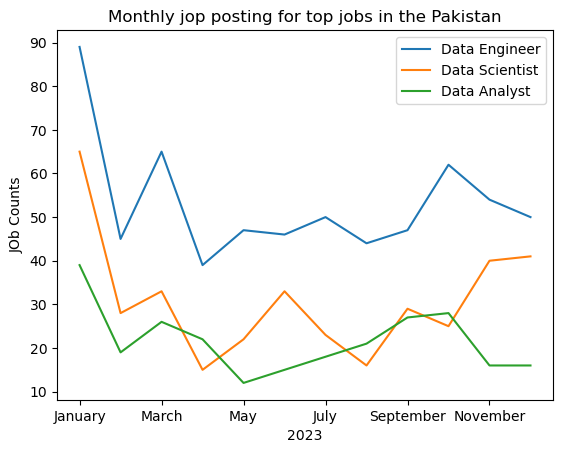

In [141]:
top_3 = df_PK['job_title_short'].value_counts().head(3)
top_3 = top_3.index.to_list()

df_PK_pivot[top_3].plot(kind='line')
plt.title('Monthly jop posting for top jobs in the Pakistan')
plt.xlabel('2023')
plt.ylabel('JOb Counts')
plt.legend()
plt.show()
